In [1]:
import os
import sys
import git
import pathlib

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

PROJ_ROOT_PATH = pathlib.Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
PROJ_ROOT =  str(PROJ_ROOT_PATH)
if PROJ_ROOT not in sys.path:
    sys.path.append(PROJ_ROOT)

print(f"Project Root Directory: {PROJ_ROOT}")

Project Root Directory: /repos/drl_csense


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [3]:
from lib.folder_paths import makeget_logging_dir, get_exp_name_tag

In [4]:
def myimshow(frame):
    plt.figure()
    plt.imshow(frame, cmap="gray")
    plt.axis("off")

In [5]:
env_id = "BreakoutNoFrameskip-v4"
exp_param_type = "noisy"
exp_param_value = 0.0
run_no = 0
model_type = "best"
eval_param_type = exp_param_type

In [155]:
eval_param_value = 0.0

# Get names and tags of experiment
exp_name, exp_metaname, exp_tag = get_exp_name_tag(env_id, exp_param_type, exp_param_value)

# Get directories
models_dir, log_dir, gif_dir, image_dir = makeget_logging_dir(exp_name)

# Load gif file
obs_gif_file = f"{gif_dir}/{exp_name}-run_{run_no}--eval_{model_type}-{eval_param_type}_{eval_param_value}--obs.gif"

obs_gif_frames = imageio.mimread(obs_gif_file)

In [156]:
obs_gif_frames_np = np.array(obs_gif_frames)[:,:,:,1]

In [157]:
obs_gif_frames_np.shape

(1198, 84, 84)

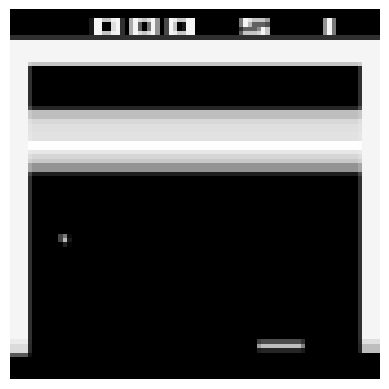

In [158]:
myimshow(obs_gif_frames_np[0,:,:])

In [228]:
no_of_training_frames = 30
idxs = np.arange(0,obs_gif_frames_np.shape[0])
np.random.shuffle(idxs)
frame_idxs = idxs[:no_of_training_frames]

In [229]:
np.sort(frame_idxs);

In [230]:
training_frames = obs_gif_frames_np[frame_idxs,:,:]

In [231]:
training_frames.shape

(30, 84, 84)

In [232]:
training_frames_flat = training_frames.reshape(no_of_training_frames,-1).T

In [233]:
training_frames_flat.shape

(7056, 30)

In [234]:
avgFrame = np.mean(training_frames_flat,axis=1).reshape(-1,1)

In [235]:
avgFrame.shape

(7056, 1)

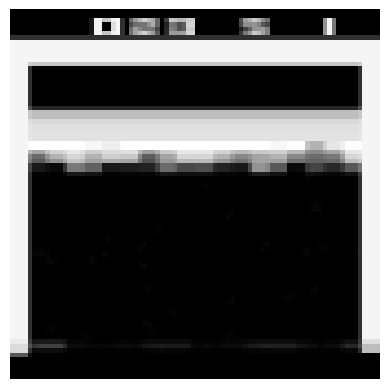

In [236]:
myimshow(avgFrame.reshape(84,84))

In [237]:
X = training_frames_flat - avgFrame

In [238]:
U, S, VT = np.linalg.svd(X,full_matrices=0)

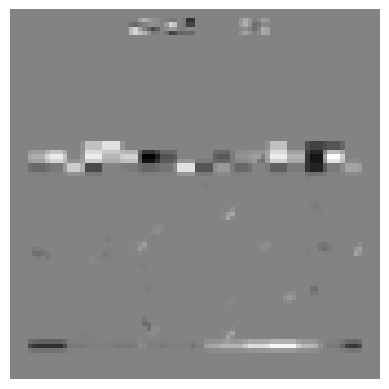

In [239]:
myimshow(U[:,3].reshape(84,84))

In [240]:
test_frame = obs_gif_frames_np[0,:,:].reshape(-1,1)

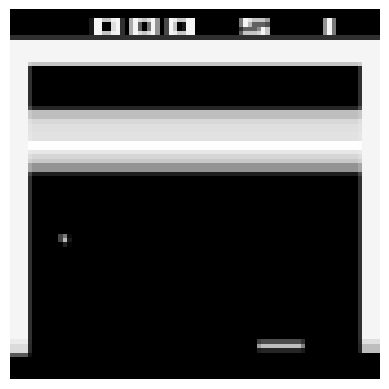

In [246]:
myimshow(test_frame.reshape(84,84))

In [241]:
test_frame_MS = test_frame - avgFrame

In [242]:
r = 1

In [243]:
# temp = U[:,:r].T @ test_frame_MS
recon_frame = avgFrame + U[:,:r] @ U[:,:r].T @ test_frame_MS

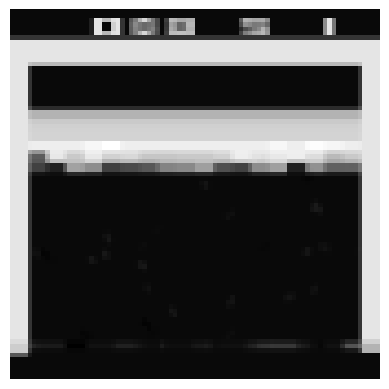

In [244]:
myimshow(recon_frame.reshape(84,84))